# **Titanic Exploatory Data Analysis in R**
---
<div style="text-align:center;">
  <figure>
    <img src="https://cdn.britannica.com/60/153160-050-CDB5B5AE/sinking-illustration-Titanic.jpg" width="300" height="300">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/724px-R_logo.svg.png" width="300" height="300">
  </figure>
</div>

In this notebook, I will try to test [R](https://www.r-project.org/) for basic exploratory data analysis procedures. For this purpose, I am going to use the well-known [Titanic](https://www.kaggle.com/c/titanic) from Kaggle.

In [20]:
library(tidyverse) # We will mainly use tidiverse to complete most of the tasks

In [2]:
titanic <- read.csv("train.csv") #  data frame from csv

# Checking data frame content
---
Below we will use some base functions for analysising the content of the dataframe:
* `head()` - returns a head of the data frame - top rows.
* `str()` - returns data frame structure - data types in each column.
* `summary()` - returns descriptive statistics summary of the data frame.

In [3]:
head(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


#### Data Frame structure

In [4]:
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [5]:
summary(titanic)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

# Data Frame manipulations
---

Now we will proceed with data frame manipulations, to get a smaller and cleanear data frame for futher analysis. First we will remove columns containing mainly unique `char` values. Next we will reassign categorical values to factors.
* `is.na()` - creates a logical vercort of `TRUE` values for missing values.
* `colSums()` - sums column feature based on passed logical vector.
___
**NOTE:**
R did not recognize severl hundreds missing values from `$Cabin`, and assigned them as empty strings. We are not going to fix it, since the column will be removed anyway in next steps. Nevertheless R did not dected severl empty strings in other columns (i.e. `$Embarked`).

In [6]:
# Determinies number of NA values in each column
titanic %>% is.na %>% colSums

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [7]:
# removes columns containing mainly unique non-numerical values
titanic <- titanic[,!names(titanic) %in% c("Cabin", "Name", "PassengerId", "Ticket")]
titanic %>% head

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
6,0,3,male,NA,0,0,8.4583,Q


### **Reassigning column to categorical data**
---
R `base` supports categorical data using `factor` data type.

In [8]:
# Factor reassigment

titanic$Survived <- factor(titanic$Survived) 
titanic$Pclass <- factor(titanic$Pclass)
titanic$Sex <- factor(titanic$Sex)
titanic$Embarked <- factor(titanic$Embarked)
str(titanic)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### **Reassigning empty strings to missing values (NA)**

The `$Embarked` has 4 levels. The description of the dataset states that this column is supposed to have only 3 values (*C = Cherbourg, Q = Queenstown, S = Southampton*). The first level is an empty string. We can assume that the empty string should be a missing value.

In such a case, we can use `factor($Embarked,exclude="")`. Alternatively, you can try `recode_factor()` from *dyplyr*, but it might be more complicated to reassign an empty string, that way.

In [9]:
# Excluding "" from a factor
factor(titanic$Embarked, exclude = "")%>% str()  # Now factor has assigned only 3 levels

 Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


In [10]:
factor(titanic$Embarked, exclude = "")%>% unique # At thesame time NA is still in the column

[1] S    C    Q    <NA>
Levels: C Q S

In [11]:
factor(
    factor(titanic$Embarked, exclude = ""), # This simulates rerunning of the cell
    exclude = "") %>% str() # NA being assigned to a new level

 Factor w/ 4 levels "C","Q","S",NA: 3 1 3 3 3 2 3 3 3 1 ...


### **Reassigning levels of categorical data**

For reassigning levels names of  `factor` data, `recode_factor()` from *dyplyr*  can be used. In fact, it is possible to call that function without changing the type to `factor` first. However, checking names beforehand might be a good idea. It would definitely help, in avoiding the usage of wrongly assigned values (i.e.`""`).

The code above is shown mainly to demonstrate one possible way to deal with wrongly assigned missing values in R. For purpose of further visualization and analysis we will assign this empty string to a string value `"unknown"`.

In [12]:
# Reassign NA to "Unknown" string
levels(titanic$Embarked)[1] <- "Unknown"
# recode_factor() is a dyplyr function
titanic$Survived <- recode_factor(titanic$Survived, "0"="No","1"="Yes") 
titanic$Pclass <- recode_factor(titanic$Pclass,"1" = "First", "2" = "Second", "3" = "Third")
titanic$Embarked <- recode_factor(titanic$Embarked,C = "Cherbourg", Q = "Queenstown", S = "Southampton")

titanic %>% str()

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "First","Second",..: 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "Cherbourg","Queenstown",..: 3 1 3 3 3 2 3 3 3 1 ...


# Plots
---
Probably the best way to make plots in R is to use `ggplot2` library from `tidyverse`. To create multiple plots on one canvas we need to use `gridExtra` library. To plot correlations plot we can use `ggcorrplot` library.

In [21]:
library(gridExtra) # Library required for multiple plot canvases

#### Histograms

Warning message:
“Removed 177 rows containing non-finite values (`stat_bin()`).”


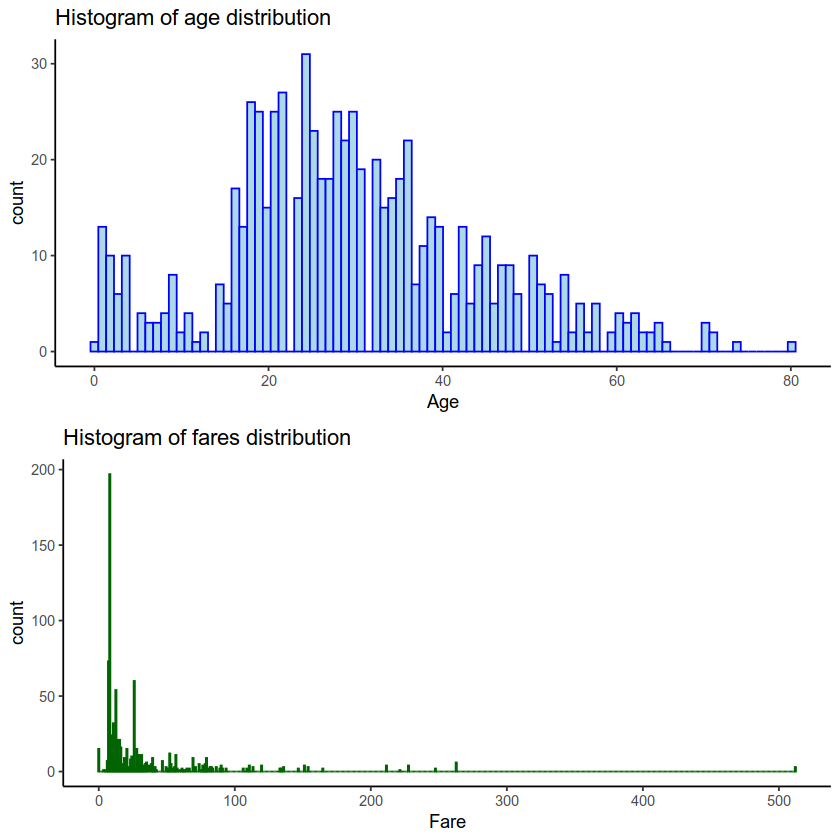

In [14]:
hist1 <- titanic %>% ggplot(aes(Age)) +
geom_histogram( fill="lightblue", color='blue', binwidth = 0.9) +
theme_classic() +
ggtitle('Histogram of age distribution')   

hist2 <- titanic %>% ggplot(aes(Fare)) +
geom_histogram( fill="green", color='darkgreen', binwidth = 0.9) +
theme_classic() +
ggtitle('Histogram of fares distribution')   

grid.arrange(hist1,hist2,ncol=1)

#### Barplots

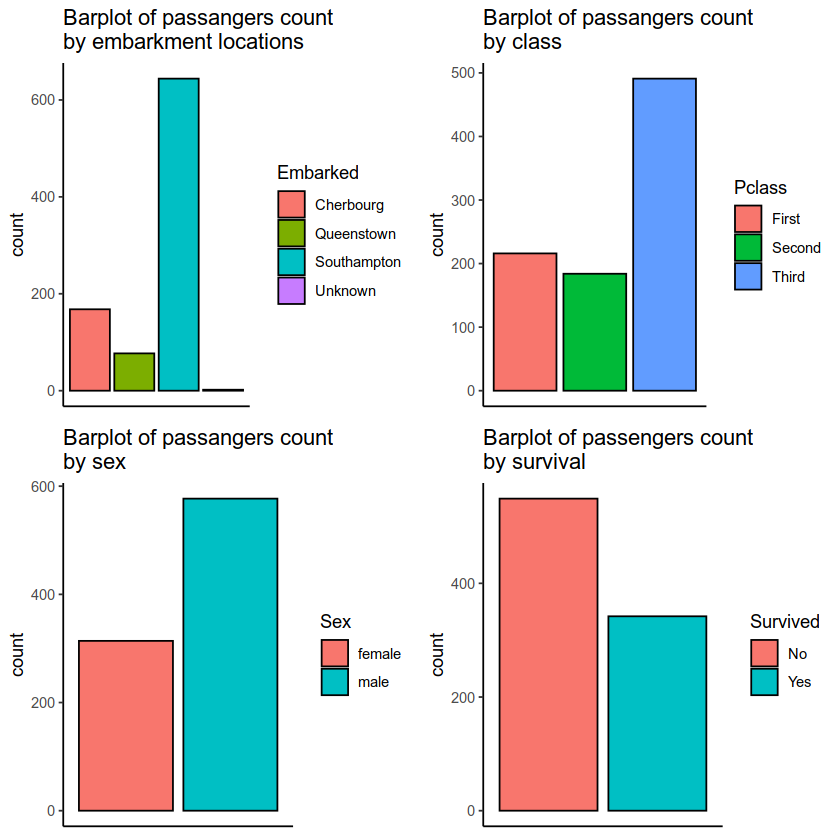

In [15]:
bplt1 <- titanic %>% ggplot(aes(
    x=Embarked,       # Plot sums of $Embarked
    fill=Embarked)) + # Split $Embarked into levels
        geom_bar(color='black' # Color edges in black
                ) + theme_classic() +  # Add theme with white background
        ggtitle("Barplot of passangers count\nby embarkment locations") + # Adds title
        theme( 
            # Removes elements of the x-axis
            # This makes graphs more clear
            # in this particular arrangment
            axis.text.x=element_blank(), 
            axis.title.x=element_blank(),
            axis.ticks.x=element_blank()
        )


bplt2 <- titanic %>% ggplot(aes(x=Pclass,fill=Pclass))+
        ggtitle("Barplot of passangers count\nby class") +
        geom_bar(color='black') + theme_classic() +
        theme(
            axis.text.x=element_blank(),
            axis.title.x=element_blank(),
            axis.ticks.x=element_blank()
        )

bplt3 <- titanic %>% ggplot(aes(x=Sex,fill=Sex)) +
        ggtitle("Barplot of passangers count\nby sex") +
         geom_bar(color='black') + theme_classic()+
         theme(
            axis.text.x=element_blank(),
            axis.title.x=element_blank(),
            axis.ticks.x=element_blank()
        )

bplt4 <- titanic %>% ggplot(aes(x=Survived, fill=Survived))+
        ggtitle("Barplot of passengers count\nby survival") +
        geom_bar(color='black') + theme_classic()+
        theme(
            axis.text.x=element_blank(),
            axis.title.x=element_blank(),
            axis.ticks.x=element_blank()
        )
grid.arrange(bplt1,bplt2,bplt3,bplt4, ncol=2)

#### Boxplots

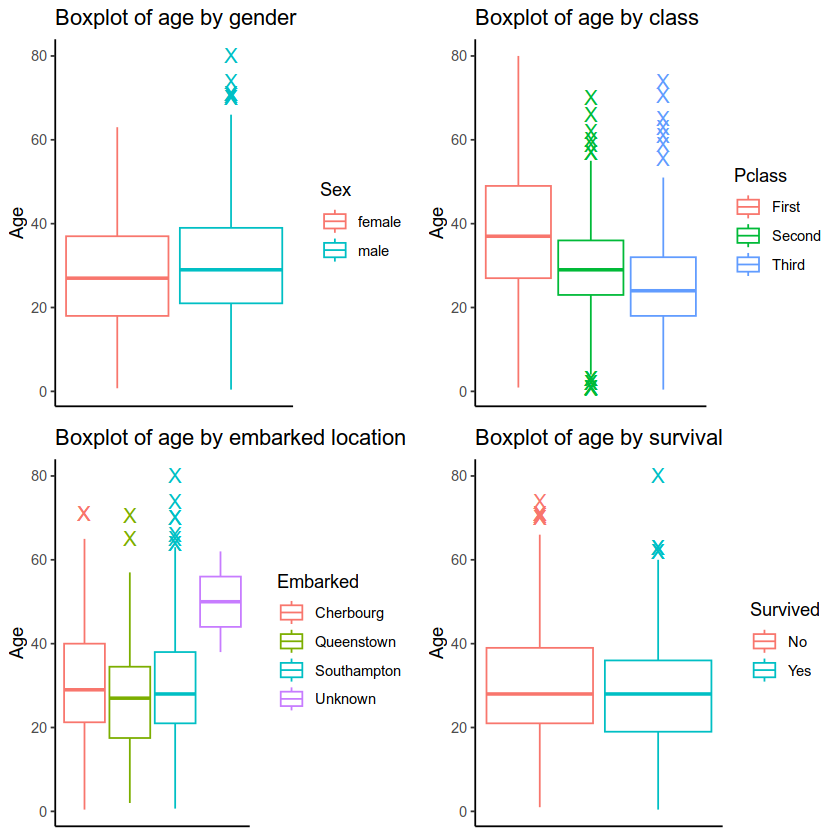

In [16]:
suppressWarnings({ # Surpress warnings about NA in $Age
    
    # Age per Sex boxplot
    bxplt1 <- titanic %>% ggplot(aes(y=Age, # Plot Age on y-axis
                                     color=Sex)) + # Color by Sex
        geom_boxplot( # Call boxplot
            # Define outliers apperance
            outlier.size = 4, outlier.shape = 'X' 
        ) + theme_classic() + # Use theme with white backgound
    ggtitle("Boxplot of age by gender") + # Add title to ta plot
        theme(
            # Remove some elements of x-axis
            axis.text.x=element_blank(),axis.ticks.x=element_blank()
        )
    # Age per Class boxplot
    bxplt2 <- titanic %>% ggplot(aes(y=Age,color=Pclass)) +
        geom_boxplot(outlier.size = 4, outlier.shape = 'X') +
        theme_classic() + ggtitle("Boxplot of age by class") +
        theme(
            axis.text.x=element_blank(),axis.ticks.x=element_blank()
        )
    # Age by Embarked boxplot
    bxplt3 <- titanic %>% ggplot(aes(y=Age,color=Embarked)) +
        geom_boxplot(outlier.size = 4, outlier.shape = 'X') +
        theme_classic() + ggtitle("Boxplot of age by embarked location") +
        theme(
            axis.text.x=element_blank(),axis.ticks.x=element_blank()
        )
    # Age by Survival boxplot
    bxplt4 <- titanic %>% ggplot(aes(y=Age,color=Survived)) +
        geom_boxplot(outlier.size = 4, outlier.shape = 'X') +
        theme_classic() + ggtitle("Boxplot of age by survival") +
        theme(
            axis.text.x=element_blank(),axis.ticks.x=element_blank()
        )
    
    # Arranging multiple plots on one canvas
    grid.arrange(bxplt1,bxplt2,bxplt3,bxplt4, ncol=2)
    })

#### Violinplots + Boxplots

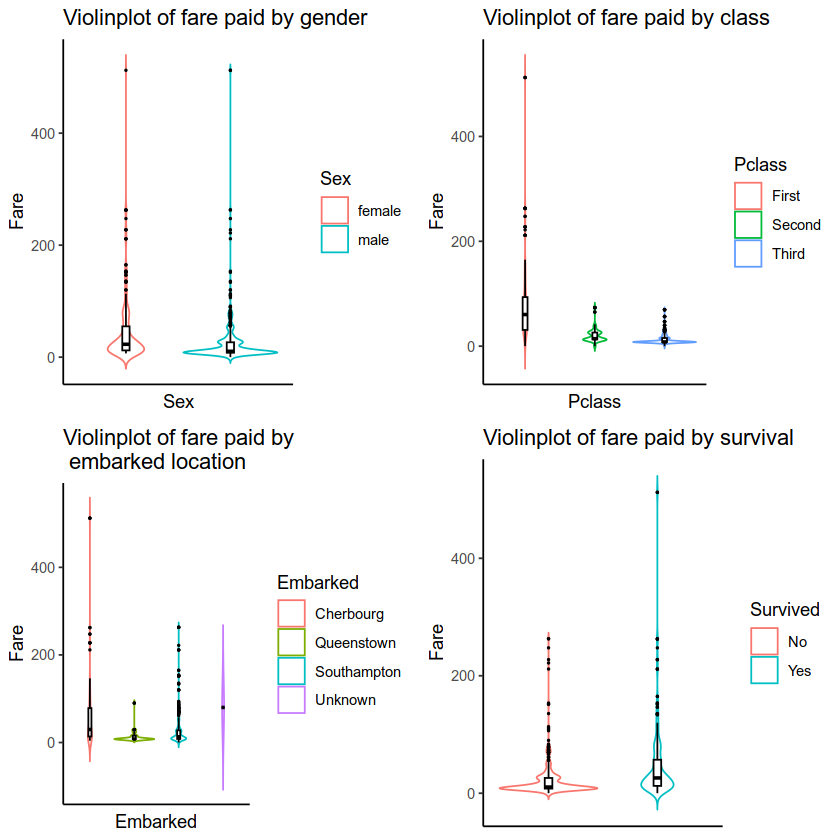

In [17]:
suppressWarnings({ # Surpress warnings about NA in $Age
    library(gridExtra) # Library required for multiple plot canvases
    # Fare per Sex boxplot
    bxplt1 <- titanic %>% ggplot(aes(x=Sex,y=Fare, color=Sex)) +
        geom_violin(trim=FALSE) + theme_classic() + ggtitle("Violinplot of fare paid by gender") +
        geom_boxplot(# Adding a boxplot on the top of violin plot
            width=0.07, color='black', outlier.size = 0.3)+
        theme(
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()
        )
    # Fare per Class boxplot
    bxplt2 <- titanic %>% ggplot(aes(x=Pclass,y=Fare,color=Pclass)) +
        geom_violin(trim=FALSE) +theme_classic() + ggtitle("Violinplot of fare paid by class") +
        geom_boxplot(# Adding a boxplot on the top of violin plot
            width=0.07, color='black', outlier.size = 0.3)+
        theme(
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()
        )
    # Fare by Embarked boxplot
    bxplt3 <- titanic %>% ggplot(aes(x=Embarked, y=Fare,color=Embarked)) +
        geom_violin(trim=FALSE) + theme_classic() + ggtitle("Violinplot of fare paid by\n embarked location") +
        # ggplot will not wrap the title by default. The same result can be achived  by using \n
        geom_boxplot(# Adding a boxplot on the top of violin plot
            width=0.07, color='black', outlier.size = 0.3)+
        theme(
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()
        )
    # Fare by Survival boxplot
    bxplt4 <- titanic %>% ggplot(aes(x= Survived,y=Fare,color=Survived)) +
        geom_violin(trim=FALSE) + theme_classic() + ggtitle("Violinplot of fare paid by survival") +
        geom_boxplot( # Adding a boxplot on the top of violin plot
            width=0.07, color='black', outlier.size = 0.3)+
        theme(
            axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()
        )
    # Arranging multiple plots on one canvas
    grid.arrange(bxplt1,bxplt2,bxplt3,bxplt4, ncol=2)
    })

#### Grouped barplots

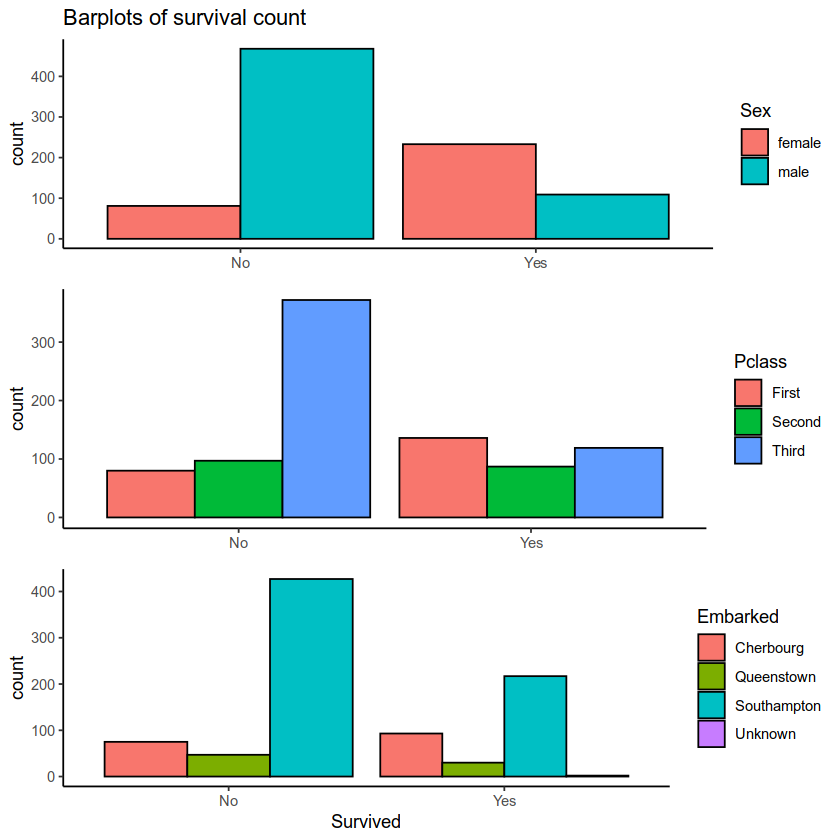

In [18]:
bp1 <- titanic %>% ggplot(aes(x = Survived,fill=Sex)) +
    geom_bar( color ='black',position=position_dodge()) +
    theme_classic() + ggtitle("Barplots of survival count") +
        theme(axis.title.x=element_blank(),)
bp2 <- titanic %>% ggplot(aes(x = Survived,fill=Pclass)) +
    geom_bar( color ='black',position=position_dodge()) +
    theme_classic() +
        theme(axis.title.x=element_blank(),)
bp3 <- titanic %>% ggplot(aes(x = Survived,fill=Embarked)) +
    geom_bar( color ='black',position=position_dodge()) +
    theme_classic()  
grid.arrange(bp1,bp2,bp3, ncol=1)

#### Correlation plots

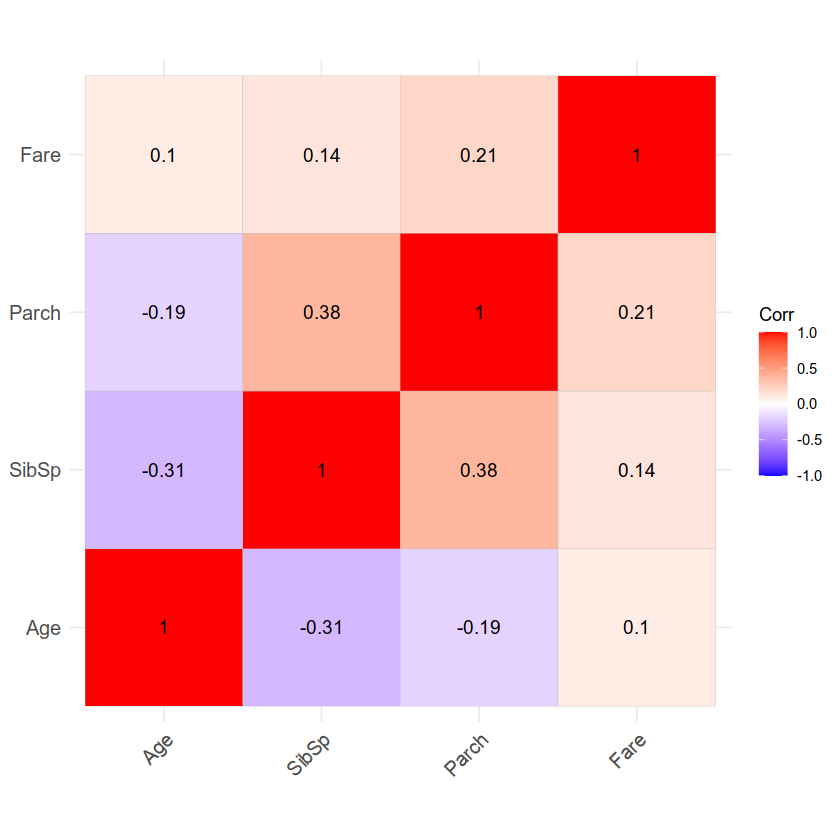

In [19]:
library(ggcorrplot) # Required for correlation plots

cor(titanic[,c("Age","SibSp","Parch","Fare") # Grabs numerical data
           ],use='complete.obs') %>% # use ='complete.obs' make cor not include NA values
    ggcorrplot(lab=TRUE) # Calls on correplation plot with labeling = TRUE